In [39]:
# Importing dataset in dataframe 
import pandas as pd
import numpy as np

df = pd.read_csv("BKB_WaterQualityData_2020084.csv") # Storing dataset in dataframe

In [40]:
# Storing DataFrame in the database

# Importing necessary libraries
import pandas as pd
import mysql 
from sqlalchemy import create_engine
import mysql.connector

# MySQL connection details
host = "localhost" # Host where MySql is running
user = "root" # MySql user name
password = "123456"   # MySQL password
database = "water_quality"   # database name

try:
    # Establish a connection to MySQL
    conn = mysql.connector.connect(
        host=host,
        user=user,
        password=password
    )
    cursor = conn.cursor()  # Creating object to execute SQL command

    # Create the database if it doesn't exist
    cursor.execute(f"CREATE DATABASE IF NOT EXISTS {database}")
    print(f"Database '{database}' is created or already existed.")
    conn.close()
except mysql.connector.Error as err:
    print(f"Error: {err}")

# Create an engine object
engine = create_engine(f"mysql+mysqlconnector://{user}:{password}@{host}/{database}")

# Saving DataFrame to a table
table_name = "your_table"
df.to_sql(name=table_name, con=engine, if_exists="replace", index=False) 
print("DataFrame is saved to MySql database.")


Database 'water_quality' is created or already existed.
DataFrame is saved to MySql database.


In [41]:
df.head(100)

,Site_Id,Unit_Id,Read_Date,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),Time (24:00),Field_Tech,DateVerified,WhoVerified,AirTemp (C),Year
0,Bay,NaN,1/3/1994,1.3,11.7,7.3,0.40,0.40,5.9,8.0,46.40,11:00,NaN,NaN,NaN,8.0,1994
1,Bay,NaN,1/31/1994,1.5,12.0,7.4,0.20,0.35,3.0,2.6,36.68,11:30,NaN,NaN,NaN,2.6,1994
2,Bay,NaN,2/7/1994,1.0,10.5,7.2,0.25,0.60,5.9,7.6,45.68,9:45,NaN,NaN,NaN,7.6,1994
3,Bay,NaN,2/23/1994,1.0,10.1,7.4,0.35,0.50,10.0,2.7,36.86,NaN,NaN,NaN,NaN,2.7,1994
4,Bay,NaN,2/28/1994,1.0,12.6,7.2,0.20,0.40,1.6,0.0,32.00,10:30,NaN,NaN,NaN,0.0,1994
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Bay,NaN,1/3/1991,0.5,11.9,7.5,0.25,0.78,9.0,NaN,51.80,19:12,Feldman,NaN,NaN,11.0,1991
96,Bay,NaN,2/4/1991,0.9,NaN,7.5,0.25,0.70,9.0,NaN,50.90,21:36,Feldman,NaN,NaN,10.5,1991
97,Bay,NaN,2/11/1991,0.7,11.1,7.5,0.30,0.41,7.5,NaN,46.40,9:36,Feldman,NaN,NaN,8.0,1991
98,Bay,NaN,2/21/1991,1.2,10.8,7.5,0.20,0.72,12.0,NaN,50.90,21:36,Feldman,NaN,NaN,10.5,1991


In [42]:
df.shape

(2371, 17)

In [43]:
# Describe the DataFrame
df.describe()

,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp-Celsius,Air Temp (?F),AirTemp (C),Year
count,2241.000000,1520.000000,2276.000000,2298.000000,2300.000000,2250.000000,85.000000,2300.000000,2371.000000,2371.000000
mean,0.717068,6.646263,7.168212,0.524898,0.762559,18.062138,16.437647,62.051637,15.663050,2006.049346
std,1.230819,2.506608,0.788485,0.473663,0.621140,8.298246,11.754138,15.492236,10.314720,9.002373
min,0.000000,0.000000,0.300000,0.000000,0.010000,0.000000,0.000000,10.500000,-17.777778,1899.000000
25%,0.000000,4.800000,6.500000,0.300000,0.400000,11.000000,9.000000,49.000000,8.888889,2001.000000
50%,0.000000,6.500000,7.000000,0.400000,0.650000,19.000000,15.000000,63.000000,16.666667,2007.000000
75%,1.000000,8.500000,7.500000,0.650000,0.950000,25.000000,21.700000,75.000000,23.888889,2012.000000
max,9.000000,15.100000,9.900000,9.000000,12.000000,74.000000,74.000000,92.300000,33.500000,2019.000000


In [44]:
# Data type of each attribute in DataFrame
df.dtypes

Site_Id                     object
Unit_Id                     object
Read_Date                   object
Salinity (ppt)             float64
Dissolved Oxygen (mg/L)    float64
pH (standard units)        float64
Secchi Depth (m)           float64
Water Depth (m)            float64
Water Temp (?C)            float64
Air Temp-Celsius           float64
Air Temp (?F)              float64
Time (24:00)                object
Field_Tech                  object
DateVerified                object
WhoVerified                 object
AirTemp (C)                float64
Year                         int64
dtype: object

In [45]:
# Finding total categorical columns
categorical_cols = df.select_dtypes(include=['object']).columns
print(categorical_cols)

Index(['Site_Id', 'Unit_Id', 'Read_Date', 'Time (24:00)', 'Field_Tech',
       'DateVerified', 'WhoVerified'],
      dtype='object')


1. DATA CHARACTERSTICS :-

Site_Id - Nominal
Unit_Id - 
Read_Date   - Numeric	
Salinity (ppt)  -	Numeric
Dissolved Oxygen (mg/L) -	Numeric
pH (standard units) - Numeric
Secchi Depth (m)	- Numeric
Water Depth (m)	- Numeric
Water Temp (?C)	- Numeric
Air Temp-Celsius    -	Numeric
Air Temp (?F)	- Numeric
Time (24:00)	- Numeric
Field_Tech	- Nominal
DateVerified    -	
WhoVerified	-
AirTemp (C)	- Numeric
Year    - Numeric

2. DATA COLLECTION AND MANIPULATION :-
   a. Dealing with categorical data 
   b. Dealing with missing value
   c. Dealing with outlier
   d. Data Scaling

In [46]:
# Finding missing value
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Replacing '?', '-99', '-999', '-1' with 'NaN' if it occurs and then finding total missing values 
df = df.replace('?', np.nan)   # Replacing '?' with 'NaN' value 
df = df.replace('-99', np.nan)  # Replacing '-99' with 'NaN'
df = df.replace('-999', np.nan)  # Replacing '-999' with 'NaN'
df = df.replace('-1', np.nan)  # Replacing '-1' with 'NaN'

# Find the missing value
print (df.isnull().sum()) # Find the missing values

Site_Id                       1
Unit_Id                    2339
Read_Date                     5
Salinity (ppt)              130
Dissolved Oxygen (mg/L)     851
pH (standard units)          95
Secchi Depth (m)             73
Water Depth (m)              71
Water Temp (?C)             121
Air Temp-Celsius           2286
Air Temp (?F)                71
Time (24:00)                 63
Field_Tech                   39
DateVerified               1918
WhoVerified                1918
AirTemp (C)                   0
Year                          0
dtype: int64


In [47]:
# Removing columns

# Removing column 'Unit_Id' 
df.drop(columns=['Unit_Id'], inplace=True)

# Removing column 'Air Temp-Celsius' 
df.drop(columns=['Air Temp-Celsius'], inplace=True)

# Removing column 'DateVerified' 
df.drop(columns=['DateVerified'], inplace=True)

# Removing column 'WhoVerified' 
df.drop(columns=['WhoVerified'], inplace=True)

In [48]:
# Find the missing value
print (df.isnull().sum()) # Find the missing values

Site_Id                      1
Read_Date                    5
Salinity (ppt)             130
Dissolved Oxygen (mg/L)    851
pH (standard units)         95
Secchi Depth (m)            73
Water Depth (m)             71
Water Temp (?C)            121
Air Temp (?F)               71
Time (24:00)                63
Field_Tech                  39
AirTemp (C)                  0
Year                         0
dtype: int64


In [49]:
df.shape

(2371, 13)

In [50]:
df.dtypes

Site_Id                     object
Read_Date                   object
Salinity (ppt)             float64
Dissolved Oxygen (mg/L)    float64
pH (standard units)        float64
Secchi Depth (m)           float64
Water Depth (m)            float64
Water Temp (?C)            float64
Air Temp (?F)              float64
Time (24:00)                object
Field_Tech                  object
AirTemp (C)                float64
Year                         int64
dtype: object

In [51]:
# Dealing with missing value
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Replacing '?', '-99', '-999', '-1' with 'NaN' if it occurs and then finding total missing values 
df = df.replace('?', np.nan)   # Replacing '?' with 'NaN' value 
df = df.replace('-99', np.nan)  # Replacing '-99' with 'NaN'
df = df.replace('-999', np.nan)  # Replacing '-999' with 'NaN'
df = df.replace('-1', np.nan)  # Replacing '-1' with 'NaN'

# Filling missing value using mean for Site_Id
# Step 1: Find the most frequent value (mode) in the 'Read_Date' column
mode_value = df['Site_Id'].mode()[0]
# Step 2: Fill missing values in the 'Read_Date' column with the mode value
df['Site_Id'] = df['Site_Id'].fillna(mode_value)

# Filling missing value using mean for Read_Date
# Step 1: Find the most frequent value (mode) in the 'Read_Date' column
mode_value = df['Read_Date'].mode()[0]
# Step 2: Fill missing values in the 'Read_Date' column with the mode value
df['Read_Date'] = df['Read_Date'].fillna(mode_value)

# Filling missing value using mean for Salinity (ppt)
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
imputer.fit( df[['Salinity (ppt)']] )
df['Salinity (ppt)'] = imputer.transform( df[['Salinity (ppt)']] )

# Filling missing value using mean for Dissolved Oxygen (mg/L)
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
imputer.fit( df[['Dissolved Oxygen (mg/L)']] )
df['Dissolved Oxygen (mg/L)'] = imputer.transform( df[['Dissolved Oxygen (mg/L)']] )

# Filling missing value using mean for pH (standard units)
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
imputer.fit( df[['pH (standard units)']] )
df['pH (standard units)'] = imputer.transform( df[['pH (standard units)']] )

# Filling missing value using mean for Secchi Depth (m)
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
imputer.fit( df[['Secchi Depth (m)']] )
df['Secchi Depth (m)'] = imputer.transform( df[['Secchi Depth (m)']] )

# Filling missing value using mean for Water Depth (m)
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
imputer.fit( df[['Water Depth (m)']] )
df['Water Depth (m)'] = imputer.transform( df[['Water Depth (m)']] )

# Filling missing value using mean for Water Temp (?C)
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
imputer.fit( df[['Water Temp (?C)']] )
df['Water Temp (?C)'] = imputer.transform( df[['Water Temp (?C)']] )

# Filling missing value using mean for Air Temp (?F)
imputer = SimpleImputer(missing_values = np.nan, strategy='mean')
imputer.fit( df[['Air Temp (?F)']] )
df['Air Temp (?F)'] = imputer.transform( df[['Air Temp (?F)']] )

# Filling missing value using mean for Time (24:00)
# Find the most frequent value (mode) in the 'Read_Date' column
mode_value = df['Time (24:00)'].mode()[0]
# Fill missing values in the 'Read_Date' column with the mode value
df['Time (24:00)'] = df['Time (24:00)'].fillna(mode_value)

# Filling missing value using mean for Field_Tech
# Find the most frequent value (mode) in the 'Read_Date' column
mode_value = df['Field_Tech'].mode()[0]
# Fill missing values in the 'Read_Date' column with the mode value
df['Field_Tech'] = df['Field_Tech'].fillna(mode_value)


print (df.isnull().sum()) # Find the missing values

Site_Id                    0
Read_Date                  0
Salinity (ppt)             0
Dissolved Oxygen (mg/L)    0
pH (standard units)        0
Secchi Depth (m)           0
Water Depth (m)            0
Water Temp (?C)            0
Air Temp (?F)              0
Time (24:00)               0
Field_Tech                 0
AirTemp (C)                0
Year                       0
dtype: int64


In [52]:
df.shape

(2371, 13)

In [53]:
# Frequency Encoding for 'Site_Id' column

import pandas as pd

# Frequency Encoding
Site_Id = df['Site_Id'].value_counts()  # Count the frequency of each category
df['Site_Id'] = df['Site_Id'].map(Site_Id)  # Map the frequency to the original column

# Display the result
print(df)

      Site_Id   Read_Date  Salinity (ppt)  Dissolved Oxygen (mg/L)  \
0         795    1/3/1994             1.3                11.700000   
1         795   1/31/1994             1.5                12.000000   
2         795    2/7/1994             1.0                10.500000   
3         795   2/23/1994             1.0                10.100000   
4         795   2/28/1994             1.0                12.600000   
...       ...         ...             ...                      ...   
2366      795  10/11/2018             1.9                 5.000000   
2367      795  10/24/2018             0.0                 9.000000   
2368      795  10/28/2018             0.9                 2.900000   
2369      795   11/7/2018             1.7                 6.646263   
2370      795  12/11/2018             0.1                 6.646263   

      pH (standard units)  Secchi Depth (m)  Water Depth (m)  Water Temp (?C)  \
0                     7.3              0.40             0.40              5.9 

In [54]:
# Removing column 'Read_Date' 
df.drop(columns=['Read_Date'], inplace=True)

# Removing column 'Time (24:00)' 
df.drop(columns=['Time (24:00)'], inplace=True)

In [55]:
# Frequency Encoding for 'Field_Tech' column

import pandas as pd

# Frequency Encoding
Field_Tech = df['Field_Tech'].value_counts()  # Count the frequency of each category
df['Field_Tech'] = df['Field_Tech'].map(Field_Tech)  # Map the frequency to the original column

# Display the result
print(df)

      Site_Id  Salinity (ppt)  Dissolved Oxygen (mg/L)  pH (standard units)  \
0         795             1.3                11.700000                  7.3   
1         795             1.5                12.000000                  7.4   
2         795             1.0                10.500000                  7.2   
3         795             1.0                10.100000                  7.4   
4         795             1.0                12.600000                  7.2   
...       ...             ...                      ...                  ...   
2366      795             1.9                 5.000000                  7.0   
2367      795             0.0                 9.000000                  7.0   
2368      795             0.9                 2.900000                  7.0   
2369      795             1.7                 6.646263                  7.0   
2370      795             0.1                 6.646263                  7.0   

      Secchi Depth (m)  Water Depth (m)  Water Temp

In [56]:
df.head(100)

,Site_Id,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp (?F),Field_Tech,AirTemp (C),Year
0,795,1.3,11.700000,7.3,0.40,0.40,5.9,46.40,1264,8.0,1994
1,795,1.5,12.000000,7.4,0.20,0.35,3.0,36.68,1264,2.6,1994
2,795,1.0,10.500000,7.2,0.25,0.60,5.9,45.68,1264,7.6,1994
3,795,1.0,10.100000,7.4,0.35,0.50,10.0,36.86,1264,2.7,1994
4,795,1.0,12.600000,7.2,0.20,0.40,1.6,32.00,1264,0.0,1994
...,...,...,...,...,...,...,...,...,...,...,...
95,795,0.5,11.900000,7.5,0.25,0.78,9.0,51.80,172,11.0,1991
96,795,0.9,6.646263,7.5,0.25,0.70,9.0,50.90,172,10.5,1991
97,795,0.7,11.100000,7.5,0.30,0.41,7.5,46.40,172,8.0,1991
98,795,1.2,10.800000,7.5,0.20,0.72,12.0,50.90,172,10.5,1991


In [57]:
# Find the missing value
print (df.isnull().sum()) # Find the missing values

Site_Id                    0
Salinity (ppt)             0
Dissolved Oxygen (mg/L)    0
pH (standard units)        0
Secchi Depth (m)           0
Water Depth (m)            0
Water Temp (?C)            0
Air Temp (?F)              0
Field_Tech                 0
AirTemp (C)                0
Year                       0
dtype: int64


In [58]:
df.shape

(2371, 11)

In [59]:
# Data type of each attribute in DataFrame
df.dtypes

Site_Id                      int64
Salinity (ppt)             float64
Dissolved Oxygen (mg/L)    float64
pH (standard units)        float64
Secchi Depth (m)           float64
Water Depth (m)            float64
Water Temp (?C)            float64
Air Temp (?F)              float64
Field_Tech                   int64
AirTemp (C)                float64
Year                         int64
dtype: object

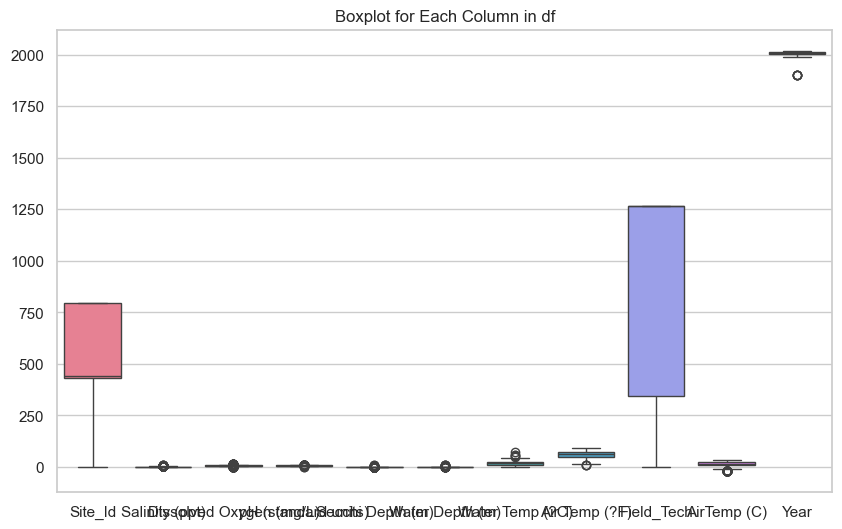

In [60]:
# Finding outlier using Box Plot
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(df)
plt.title('Boxplot for Each Column in df')
plt.show()

In [61]:
df.head(10)

,Site_Id,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp (?F),Field_Tech,AirTemp (C),Year
0,795,1.3,11.7,7.3,0.40,0.40,5.9,46.40,1264,8.0,1994
1,795,1.5,12.0,7.4,0.20,0.35,3.0,36.68,1264,2.6,1994
2,795,1.0,10.5,7.2,0.25,0.60,5.9,45.68,1264,7.6,1994
3,795,1.0,10.1,7.4,0.35,0.50,10.0,36.86,1264,2.7,1994
4,795,1.0,12.6,7.2,0.20,0.40,1.6,32.00,1264,0.0,1994
5,795,1.0,9.9,7.1,0.20,0.90,9.7,59.36,1264,15.2,1994
6,795,0.5,10.4,7.2,0.25,0.75,9.8,50.18,1264,10.1,1994
7,795,1.0,9.2,7.1,0.15,0.95,16.1,71.78,1264,22.1,1994
8,795,1.0,9.2,7.2,0.25,0.75,15.0,56.30,1264,13.5,1994
9,795,1.0,8.6,7.3,0.20,0.75,15.7,55.40,1264,13.0,1994


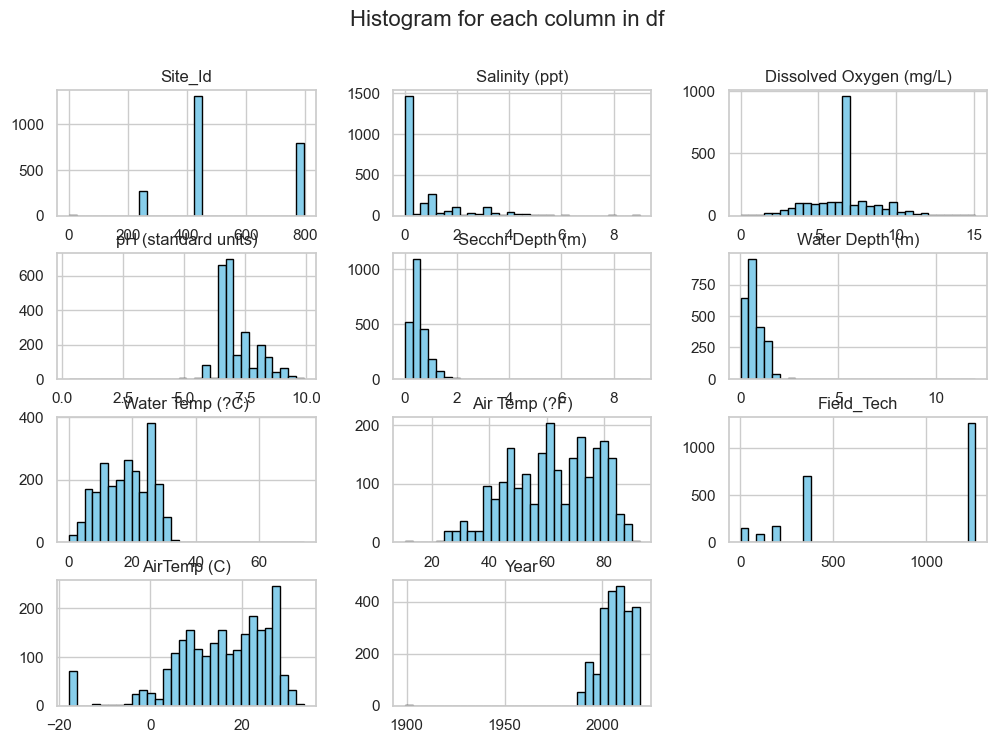

In [62]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for all numerical columns in the dataframe
df.hist(bins=30, figsize=(12, 8), color='skyblue', edgecolor='black')
plt.suptitle('Histogram for each column in df', fontsize=16)
plt.show()


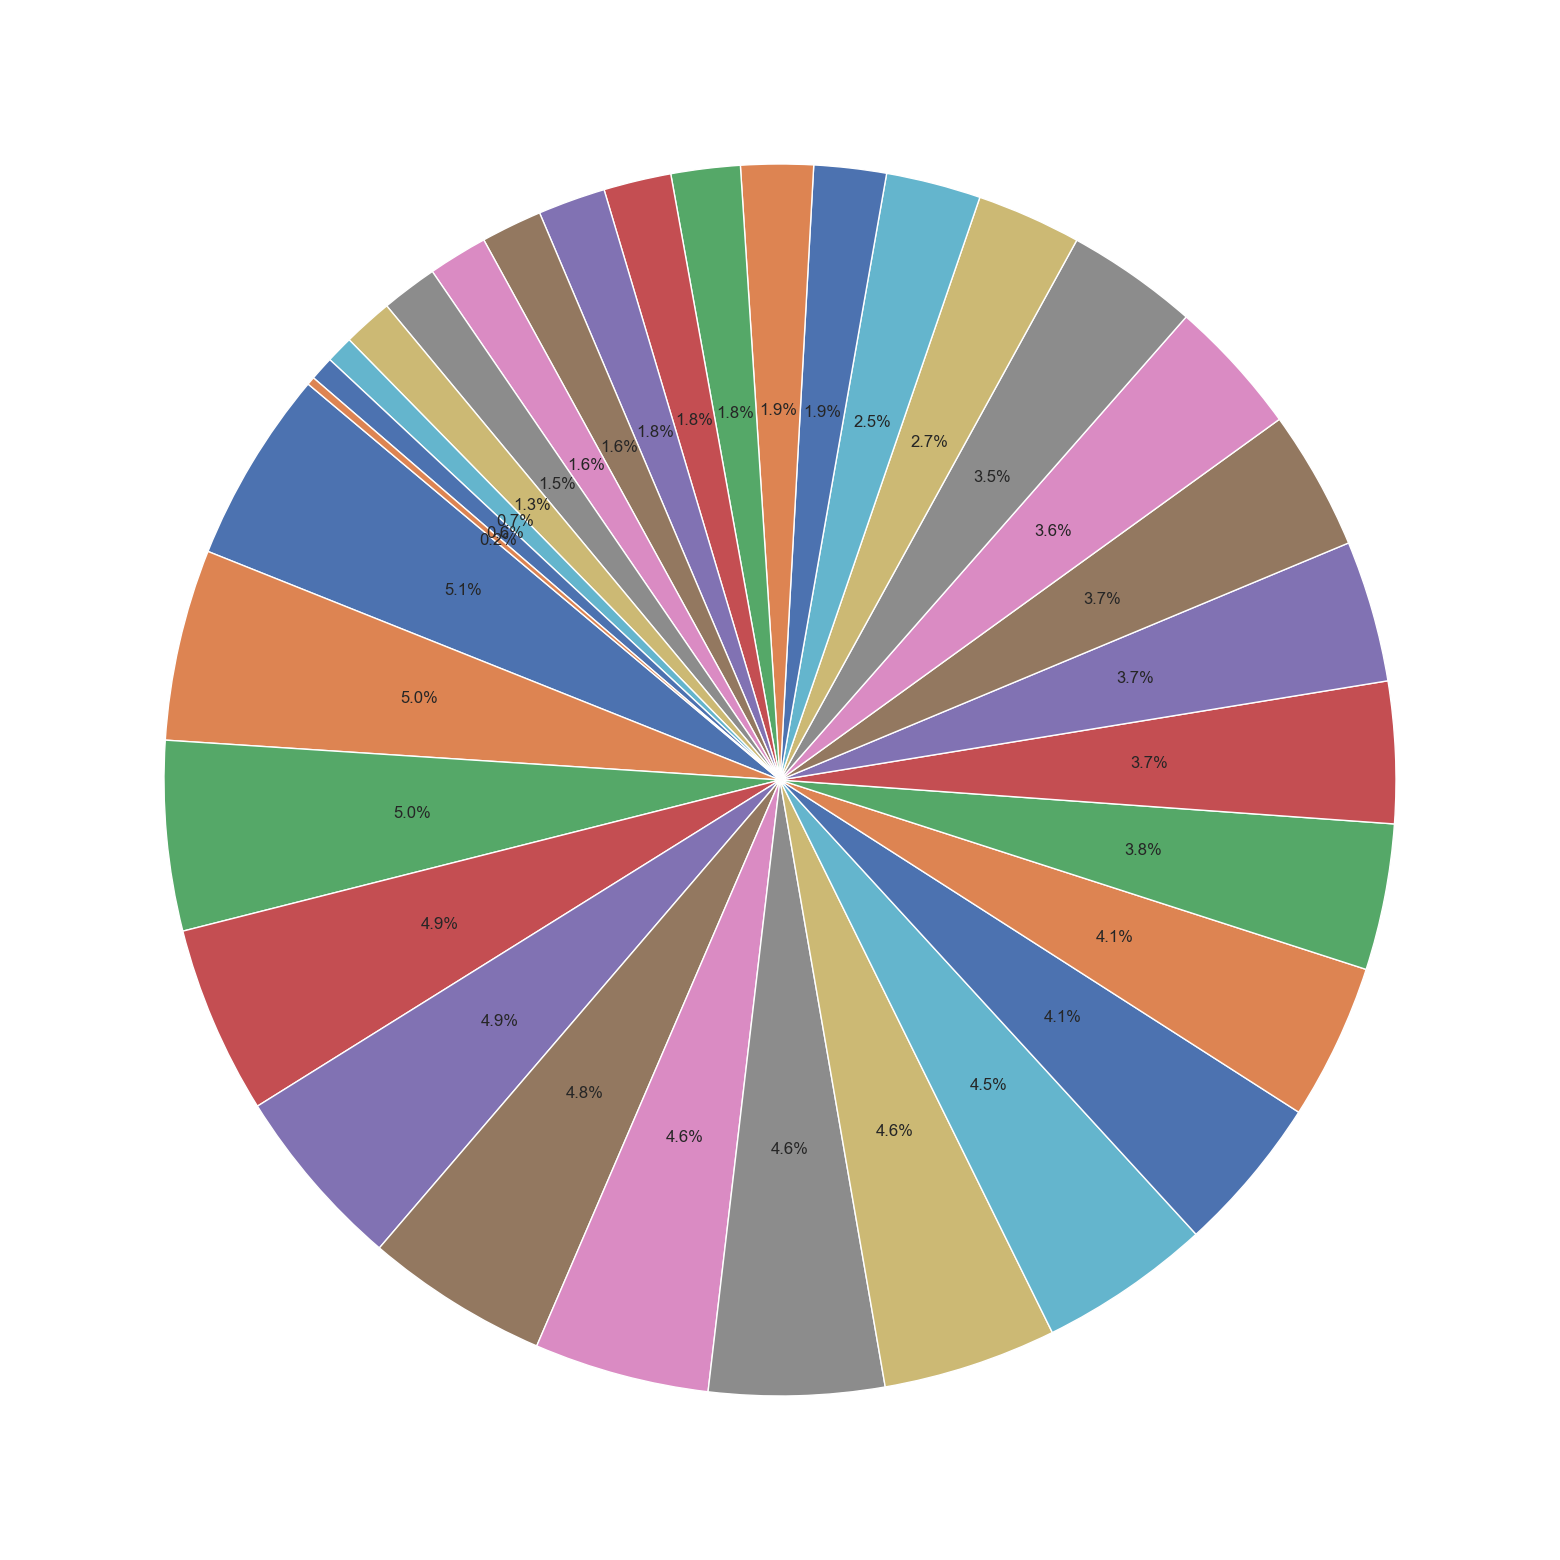

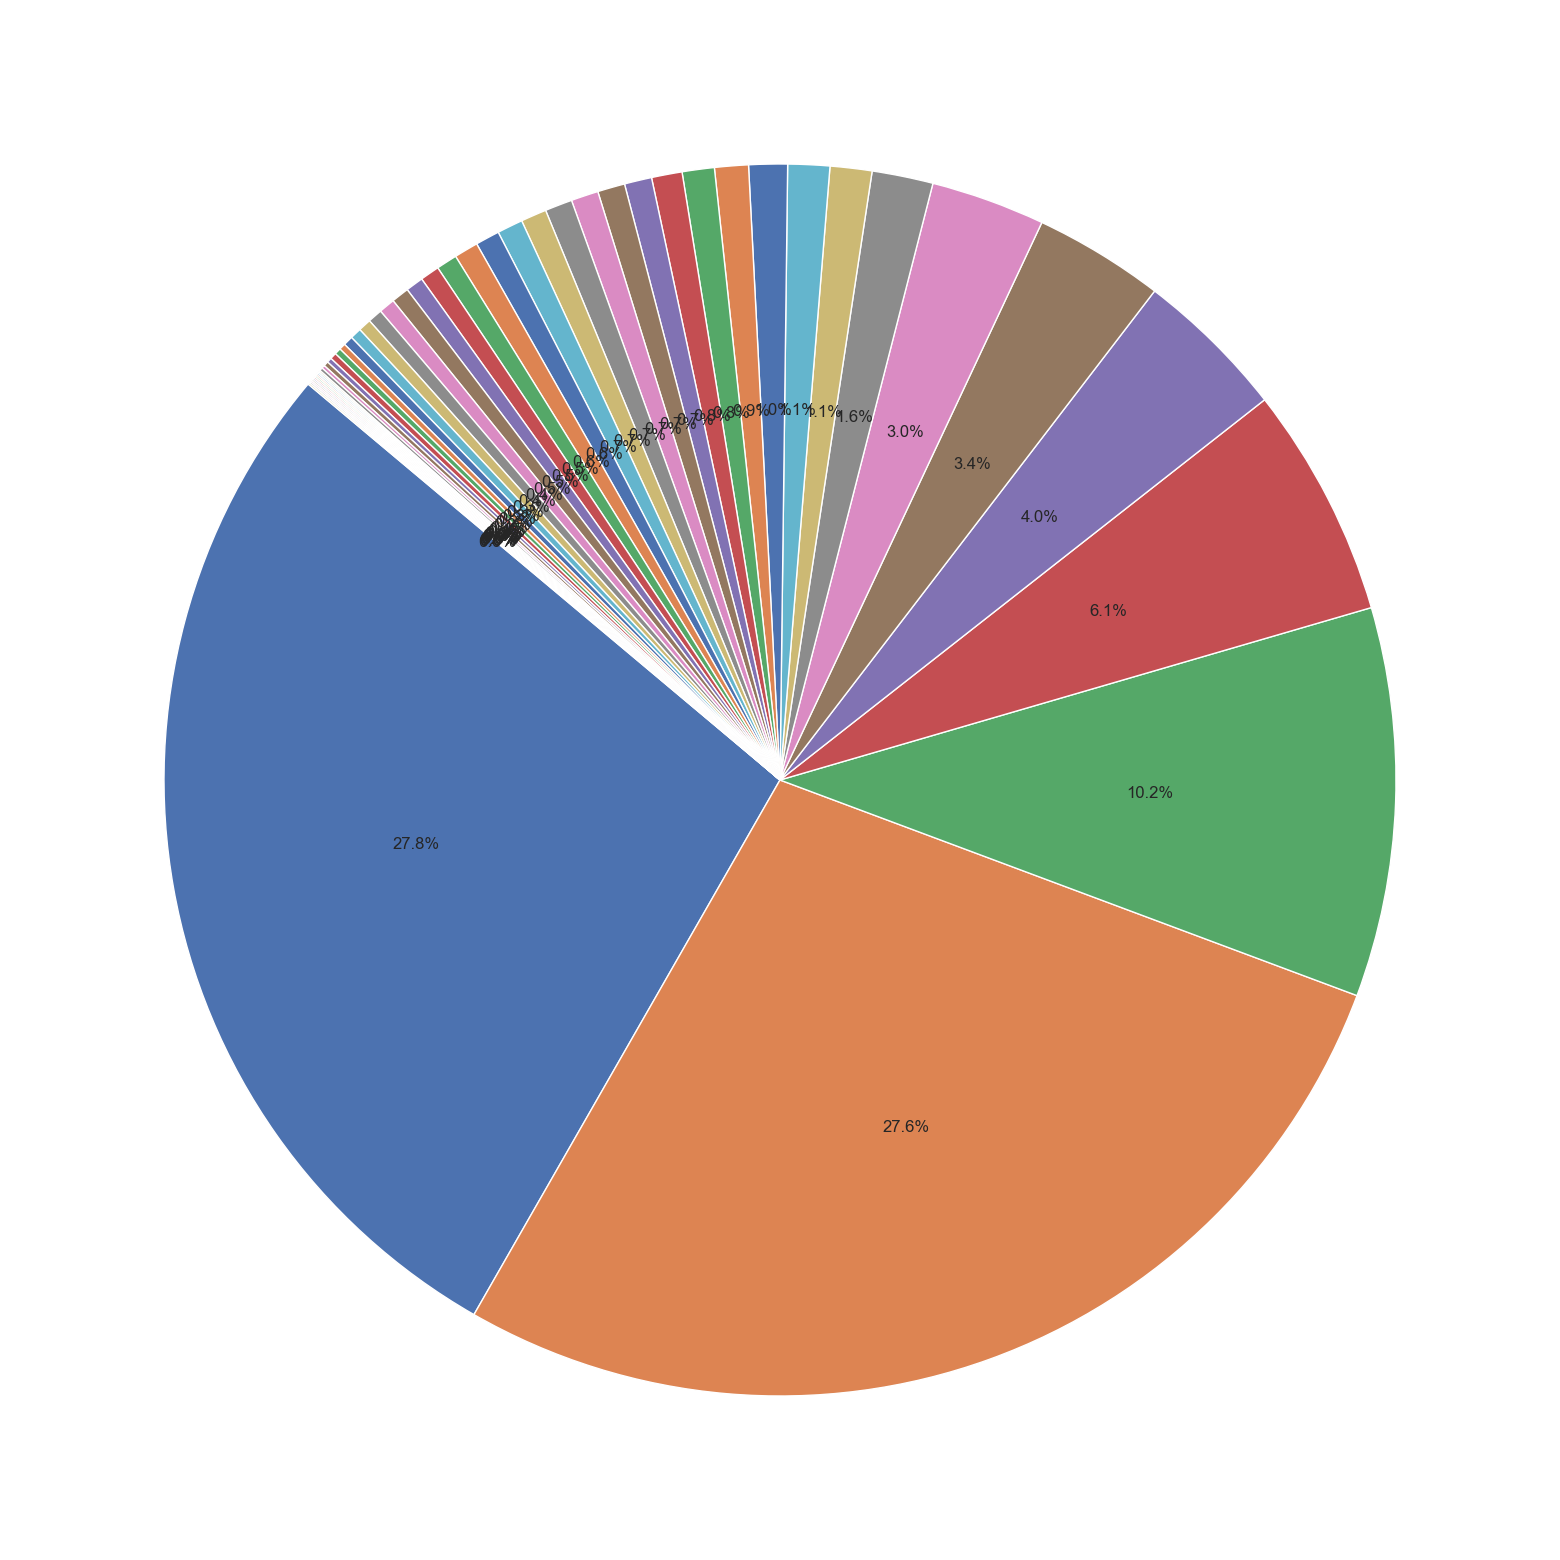

In [63]:
# Pie Chart

from sklearn.impute import SimpleImputer
import numpy as np

plt.figure(figsize=(40,20))
plt.pie(df["Year"].value_counts(), autopct='%1.1f%%', startangle=140)
plt.show()


# Pie Chart

from sklearn.impute import SimpleImputer
import numpy as np

plt.figure(figsize=(40,20))
plt.pie(df["pH (standard units)"].value_counts(), autopct='%1.1f%%', startangle=140)
plt.show()

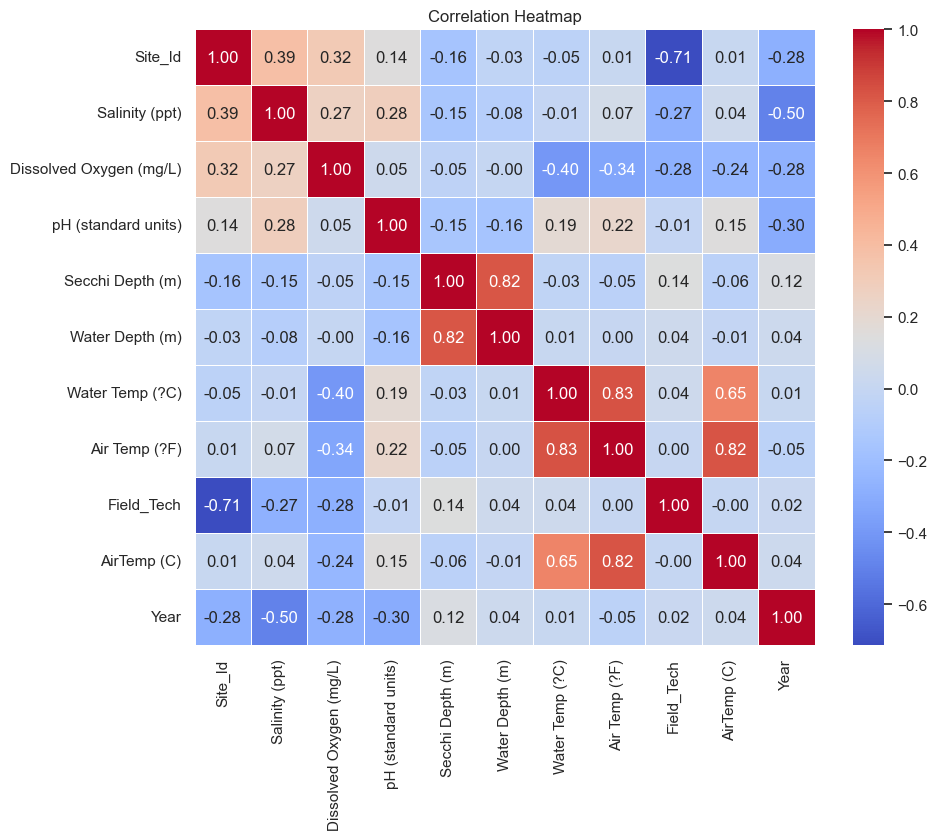

In [64]:
# Calculate correlation matrix
corr = df.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


In [65]:
df.head(10)

,Site_Id,Salinity (ppt),Dissolved Oxygen (mg/L),pH (standard units),Secchi Depth (m),Water Depth (m),Water Temp (?C),Air Temp (?F),Field_Tech,AirTemp (C),Year
0,795,1.3,11.7,7.3,0.40,0.40,5.9,46.40,1264,8.0,1994
1,795,1.5,12.0,7.4,0.20,0.35,3.0,36.68,1264,2.6,1994
2,795,1.0,10.5,7.2,0.25,0.60,5.9,45.68,1264,7.6,1994
3,795,1.0,10.1,7.4,0.35,0.50,10.0,36.86,1264,2.7,1994
4,795,1.0,12.6,7.2,0.20,0.40,1.6,32.00,1264,0.0,1994
5,795,1.0,9.9,7.1,0.20,0.90,9.7,59.36,1264,15.2,1994
6,795,0.5,10.4,7.2,0.25,0.75,9.8,50.18,1264,10.1,1994
7,795,1.0,9.2,7.1,0.15,0.95,16.1,71.78,1264,22.1,1994
8,795,1.0,9.2,7.2,0.25,0.75,15.0,56.30,1264,13.5,1994
9,795,1.0,8.6,7.3,0.20,0.75,15.7,55.40,1264,13.0,1994


C:\Users\DHRUVA DESWAL\AppData\Local\Temp\ipykernel_17776\2654408431.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pH (standard units)', y='Water Depth (m)', data=df, ci=None)


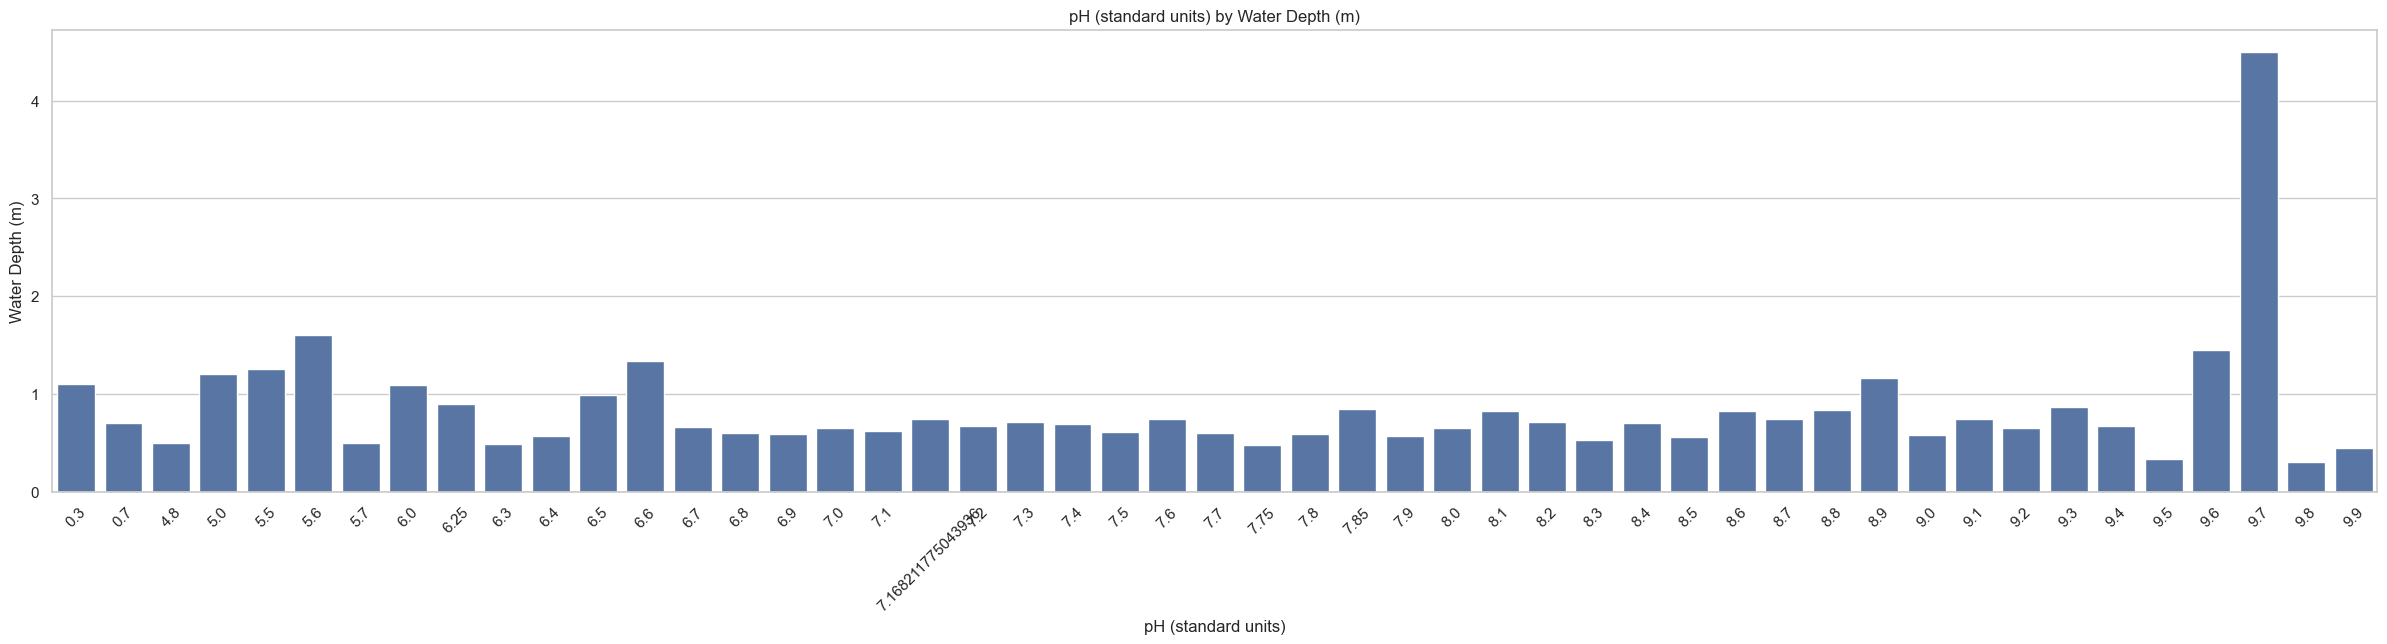

C:\Users\DHRUVA DESWAL\AppData\Local\Temp\ipykernel_17776\2654408431.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Dissolved Oxygen (mg/L)', y='Secchi Depth (m)', data=df, ci=None)


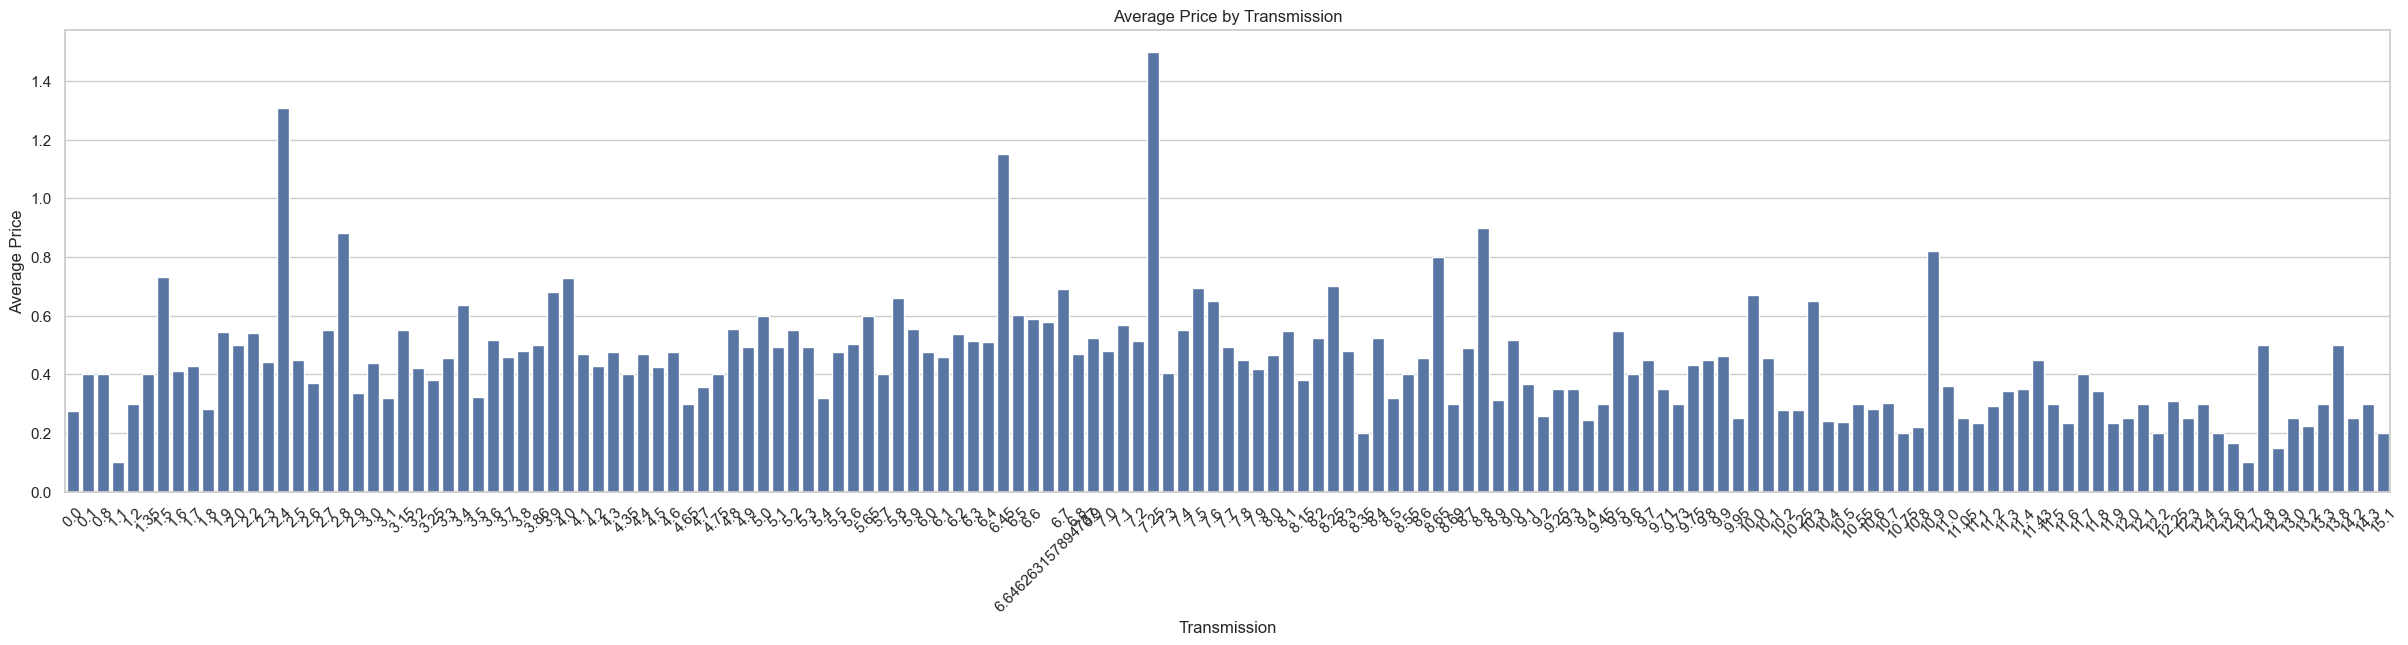

C:\Users\DHRUVA DESWAL\AppData\Local\Temp\ipykernel_17776\2654408431.py:27: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Salinity (ppt)', y='Dissolved Oxygen (mg/L)', data=df, ci=None)


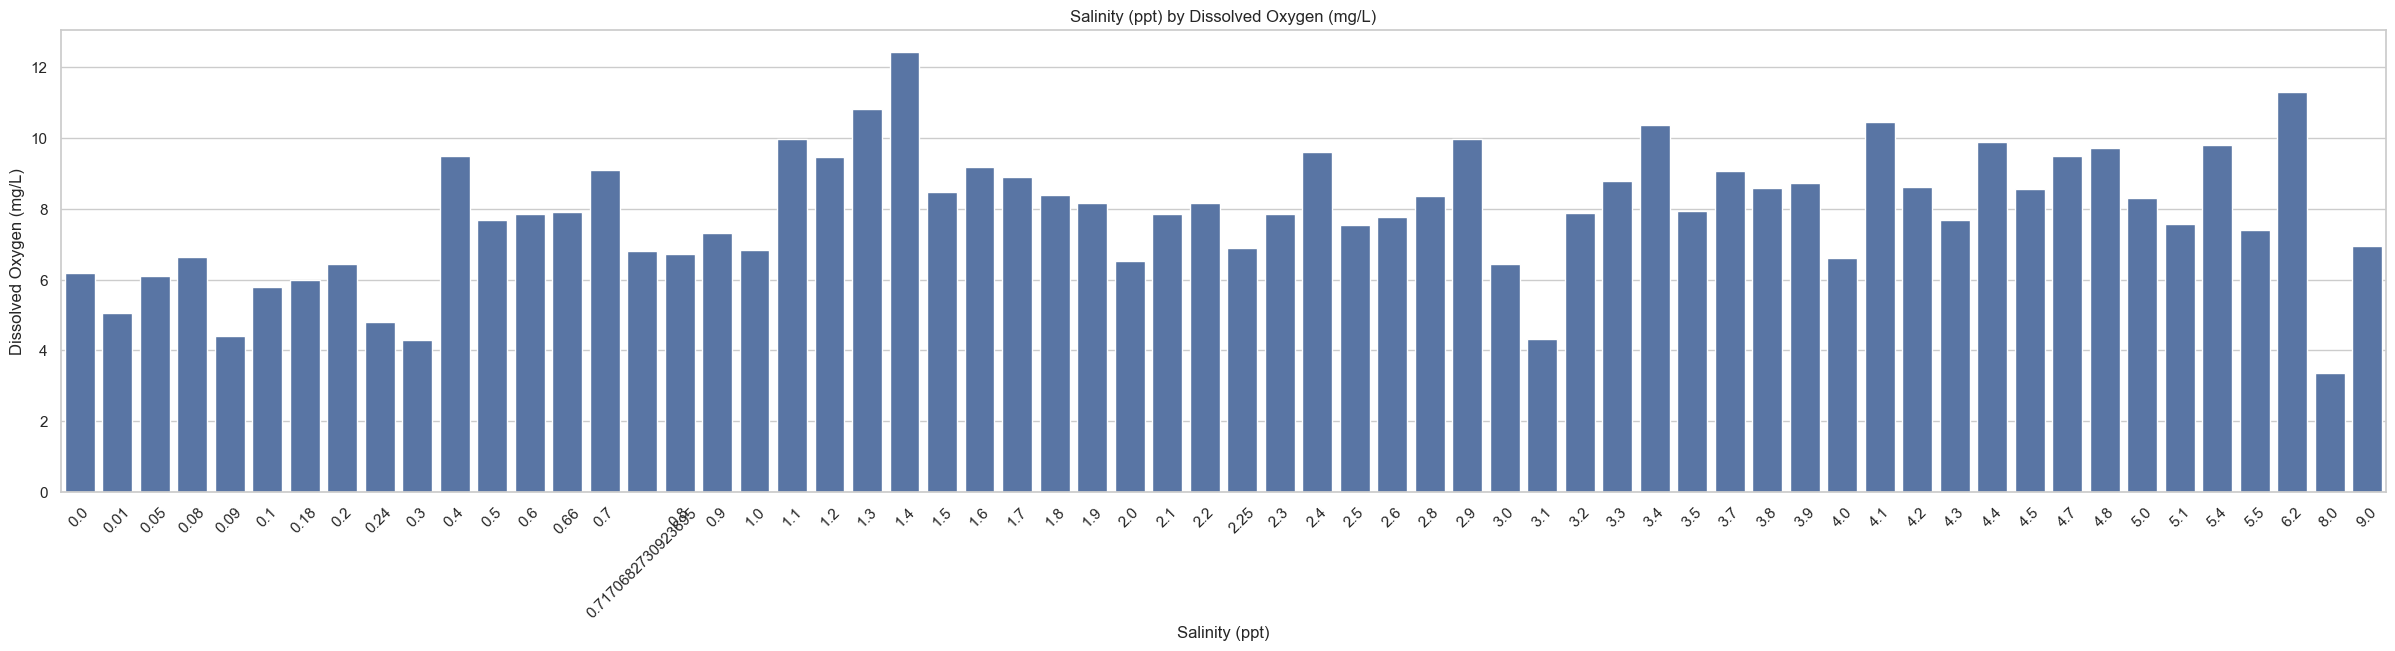

C:\Users\DHRUVA DESWAL\AppData\Local\Temp\ipykernel_17776\2654408431.py:36: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='pH (standard units)', y='Water Temp (?C)', data=df, ci=None)


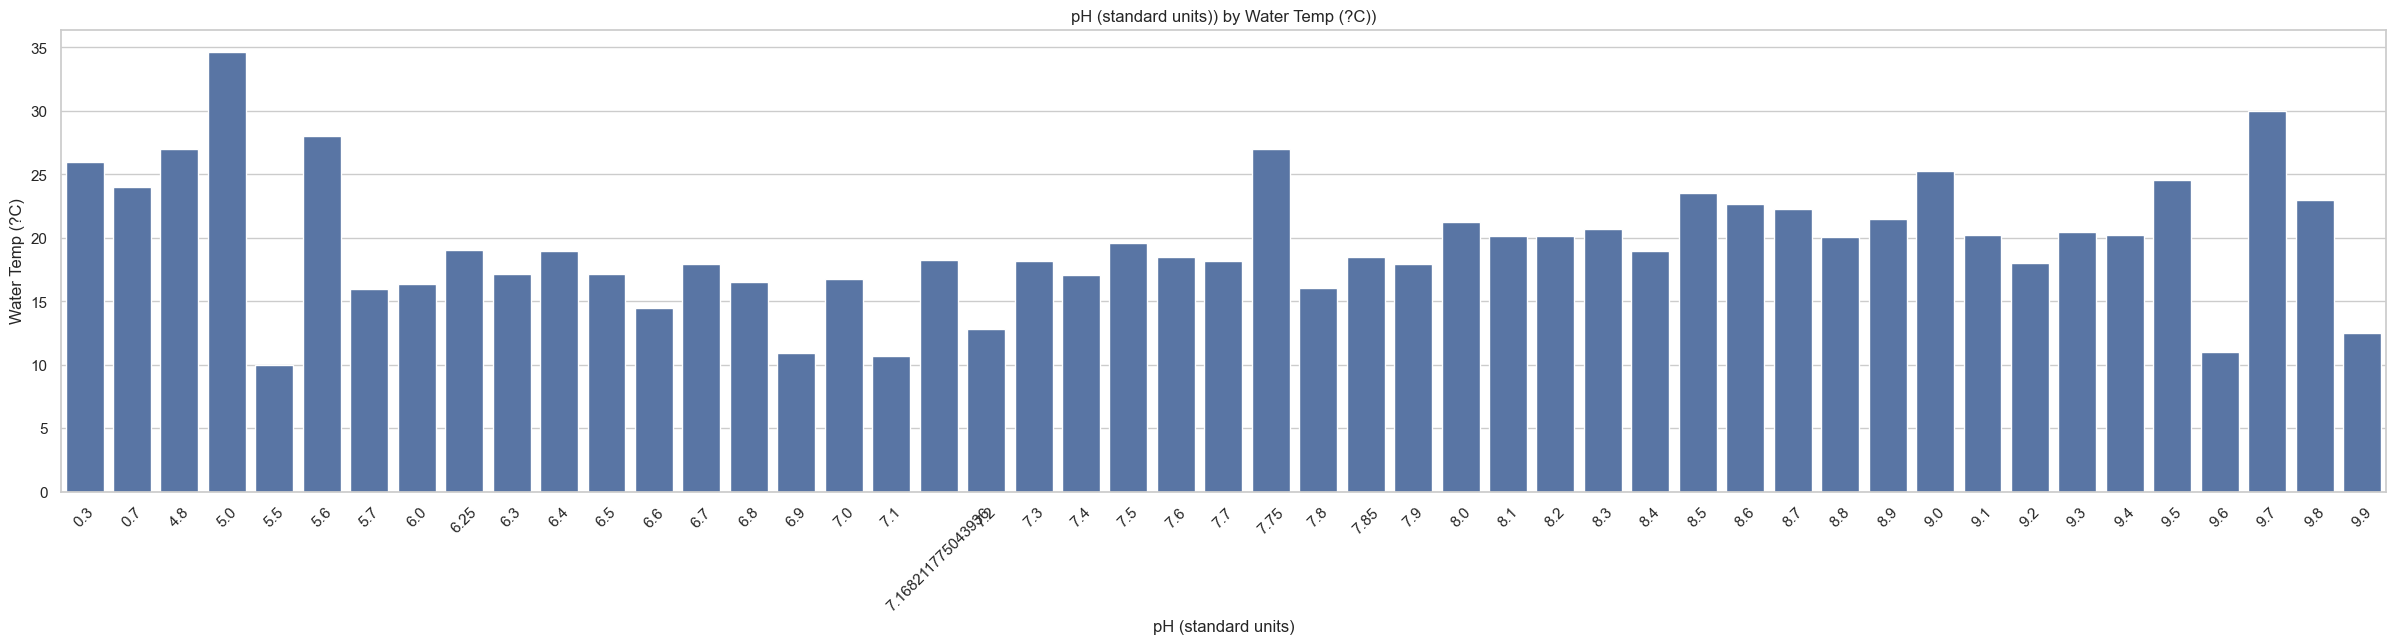

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame with the provided columns

# Bar graph for average Year based on Fuel_Type
plt.figure(figsize=(30,6))
sns.barplot(x='pH (standard units)', y='Water Depth (m)', data=df, ci=None)
plt.title('pH (standard units) by Water Depth (m)')
plt.xlabel('pH (standard units)')
plt.ylabel('Water Depth (m)')
plt.xticks(rotation=45)
plt.show()

# Bar graph for Dissolved Oxygen (mg/L) and Secchi Depth (m)
plt.figure(figsize=(30,6))
sns.barplot(x='Dissolved Oxygen (mg/L)', y='Secchi Depth (m)', data=df, ci=None)
plt.title('Average Price by Transmission')
plt.xlabel('Transmission')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.show()

# Bar graph for Dissolved Oxygen (mg/L) and pH (standard units)
plt.figure(figsize=(30,6))
sns.barplot(x='Salinity (ppt)', y='Dissolved Oxygen (mg/L)', data=df, ci=None)
plt.title('Salinity (ppt) by Dissolved Oxygen (mg/L)')
plt.xlabel('Salinity (ppt)')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.xticks(rotation=45)
plt.show()

# Bar graph for pH (standard units) and Water Temp (?C)
plt.figure(figsize=(30,6))
sns.barplot(x='pH (standard units)', y='Water Temp (?C)', data=df, ci=None)
plt.title('pH (standard units)) by Water Temp (?C))')
plt.xlabel('pH (standard units)')
plt.ylabel('Water Temp (?C)')
plt.xticks(rotation=45)
plt.show()

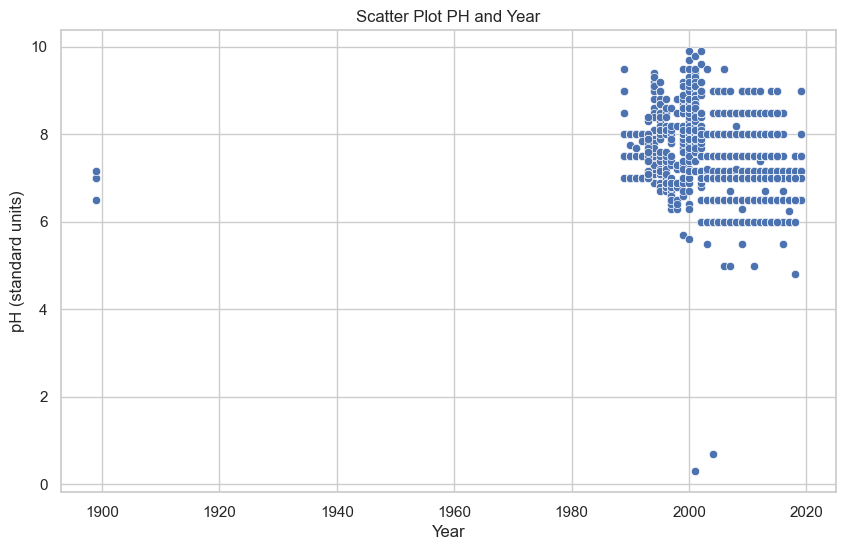

In [67]:
# Scatter plot 

import matplotlib.pyplot as plt
import seaborn as sns

# Example columns for scatter plot 
x_column = 'Year'  # Replace with the name of the x-axis feature
y_column = 'pH (standard units)'  # Replace with the name of the y-axis feature
# Alternatively, scatter plot using Seaborn
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=x_column, y=y_column)  # Add 'hue' and 'style' if categorical data exists
plt.title('Scatter Plot PH and Year')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.grid(True)
plt.show()

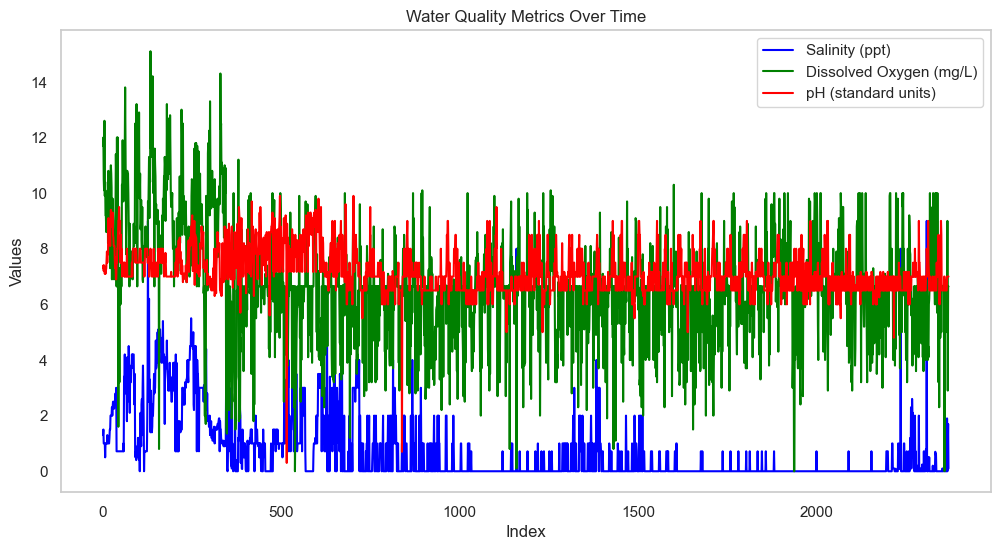

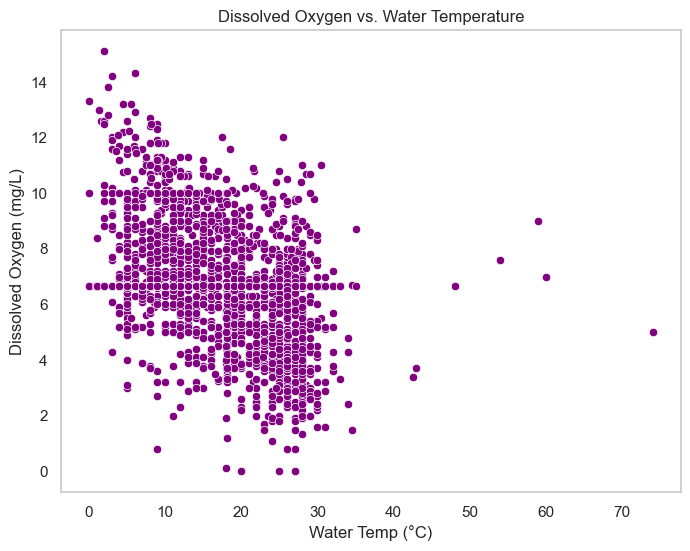

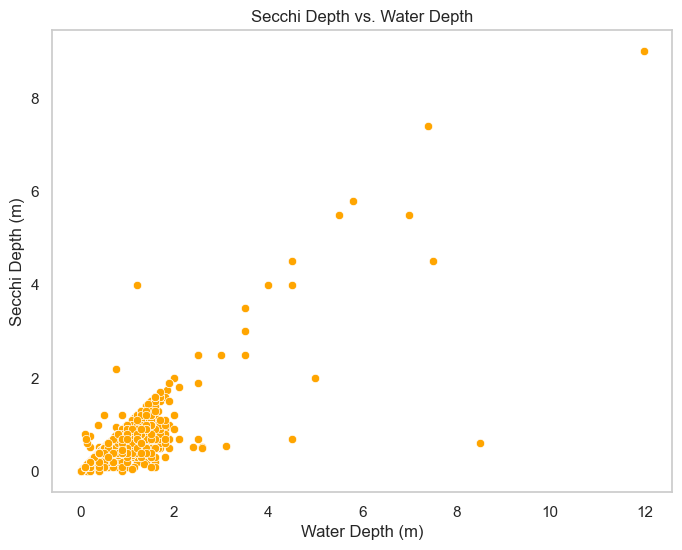

In [68]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
#data = pd.read_csv("your_dataset.csv")  # Replace with your actual dataset path

# Convert Air Temp (?F) to float if necessary
#data['Air Temp (?F)'] = pd.to_numeric(data['Air Temp (?F)'], errors='coerce')

# Time Series for Salinity, Dissolved Oxygen, and pH
plt.figure(figsize=(12, 6))
for col, color in zip(['Salinity (ppt)', 'Dissolved Oxygen (mg/L)', 'pH (standard units)'], ['blue', 'green', 'red']):
    plt.plot(df.index, df[col], label=col, color=color)

plt.title('Water Quality Metrics Over Time')
plt.xlabel('Index')
plt.ylabel('Values')
plt.legend()
plt.grid()
plt.show()

# Scatter Plot: Dissolved Oxygen vs. Water Temperature
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Water Temp (?C)', y='Dissolved Oxygen (mg/L)', data=df, color='purple')
plt.title('Dissolved Oxygen vs. Water Temperature')
plt.xlabel('Water Temp (°C)')
plt.ylabel('Dissolved Oxygen (mg/L)')
plt.grid()
plt.show()


# Secchi Depth vs. Water Depth Scatter Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Water Depth (m)', y='Secchi Depth (m)', data=df, color='orange')
plt.title('Secchi Depth vs. Water Depth')
plt.xlabel('Water Depth (m)')
plt.ylabel('Secchi Depth (m)')
plt.grid()
plt.show()


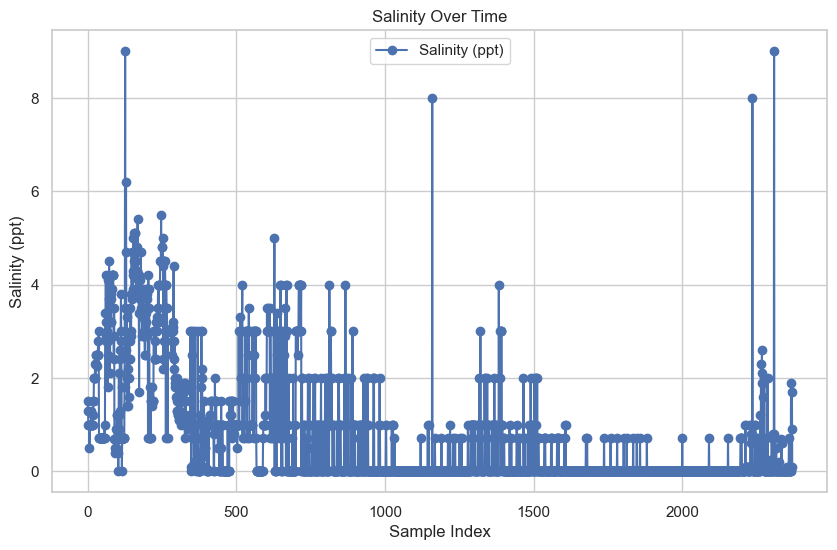

In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# Plotting
sns.set_theme(style="whitegrid")

# 1. Salinity Over Time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Salinity (ppt)'], marker='o', label='Salinity (ppt)')
plt.title('Salinity Over Time')
plt.xlabel('Sample Index')
plt.ylabel('Salinity (ppt)')
plt.legend()
plt.show()

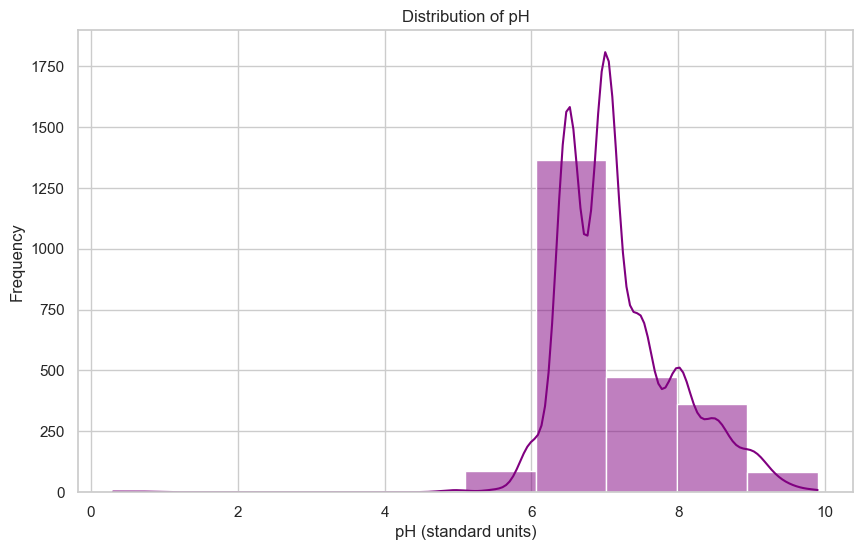

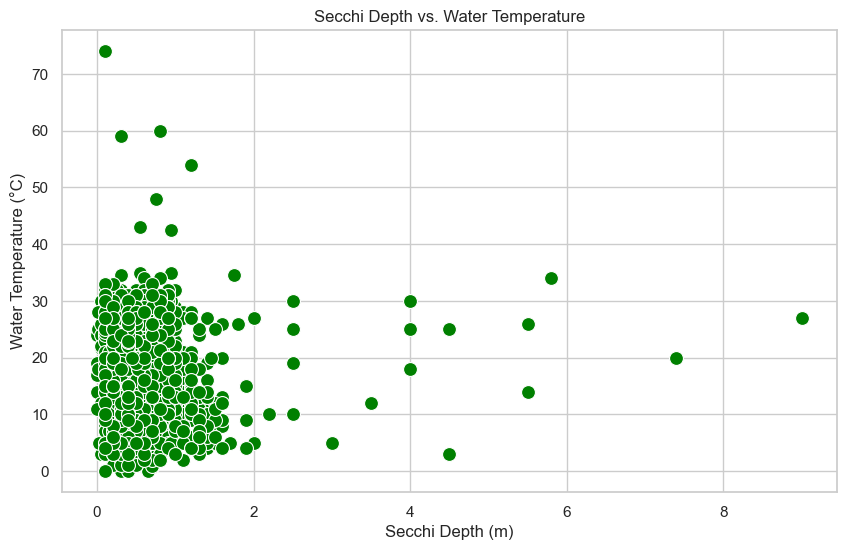

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Histogram for pH
plt.figure(figsize=(10, 6))
sns.histplot(df["pH (standard units)"], bins=10, kde=True, color="purple")
plt.title("Distribution of pH")
plt.xlabel("pH (standard units)")
plt.ylabel("Frequency")
plt.show()

# Scatter Plot for Secchi Depth vs. Water Depth
plt.figure(figsize=(10, 6))
sns.scatterplot(x="Secchi Depth (m)", y="Water Temp (?C)", data=df, color="green", s=100)
plt.title("Secchi Depth vs. Water Temperature")
plt.xlabel("Secchi Depth (m)")
plt.ylabel("Water Temperature (°C)")
plt.show()

In [71]:
# Data Splittind and Sampling

# Import necessary libraries
from sklearn.model_selection import train_test_split

# Defining Features (X) and Target (y)
X = df.drop('Year', axis=1)  # All columns except the target
y = df['Year']  # The target column

# Performing the Simple Split (Hold-out)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Print the shape of training and testing sets to verify the split
print(f"Training set features shape: {X_train.shape}")
print(f"Test set features shape: {X_test.shape}")
print(f"Training set target shape: {y_train.shape}")
print(f"Test set target shape: {y_test.shape}")

Training set features shape: (1896, 10)
Test set features shape: (475, 10)
Training set target shape: (1896,)
Test set target shape: (475,)


In [72]:
# RandomForest Regression

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Train a Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 2.0531663157894724
Mean Squared Error: 11.103384143157914
Root Mean Squared Error: 3.3321740865623926


In [73]:
# Linear Regression 

# Import the necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler

# Train the Logistic Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 4.091630699868457
Mean Squared Error: 27.91955106575112
Root Mean Squared Error: 5.283895444248601


In [74]:
# DecisionTree Regresson

# Import necessary libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train the DecisionTreeRegressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Make predictions
y_pred = regressor.predict(X_test)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')

Mean Absolute Error: 2.4042105263157896
Mean Squared Error: 26.812631578947368
Root Mean Squared Error: 5.178091499669291
